In [55]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso

In [3]:
my_ratings = pd.read_csv('../data/ml-latest-small/my-ratings.csv')
movies = pd.read_csv('../data/ml-latest-small/movies.csv')
genres = pd.read_pickle('../data/ml-latest-small/genres.p')

In [4]:
my_ratings.shape

(12, 4)

In [5]:
my_ratings['userId'].value_counts()

1000    12
Name: userId, dtype: int64

In [20]:
my_ratings = my_ratings.merge(movies, on='movieId').merge(genres, left_on='movieId', right_index=True)

In [21]:
user1000 = my_ratings[my_ratings['userId'] == 1000]

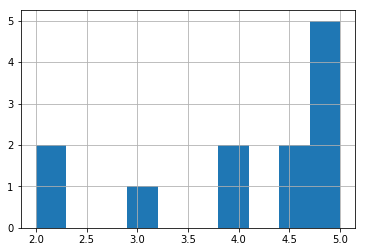

In [22]:
user1000['rating'].hist()

In [23]:
user1000['rating'].describe()

count    12.000000
mean      4.083333
std       1.144817
min       2.000000
25%       3.750000
50%       4.500000
75%       5.000000
max       5.000000
Name: rating, dtype: float64

In [24]:
user1000[user1000['rating'] == 5.0]

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1000,168250,5.0,2020-06-13 22:09:34,Get Out (2017),Horror,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1000,164909,5.0,2020-06-16 22:09:34,La La Land (2016),Comedy|Drama|Romance,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1000,104374,5.0,2020-06-17 22:09:34,About Time (2013),Drama|Fantasy|Romance,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1000,156387,5.0,2020-06-18 22:09:34,Sing Street (2016),Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1000,79132,5.0,2020-06-21 22:09:34,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,0,1,0,0,...,0,0,1,0,1,0,1,1,0,0


In [25]:
user1000[user1000['rating'] == 2.0]

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,1000,106696,2.0,2020-06-14 22:09:34,Frozen (2013),Adventure|Animation|Comedy|Fantasy|Musical|Rom...,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
2,1000,122922,2.0,2020-06-15 22:09:34,Doctor Strange (2016),Action|Adventure|Sci-Fi,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0


* 많이 본 genre 찾기

In [26]:
genre_cols = genres.columns

In [27]:
len(genre_cols)

20

In [28]:
genres.columns

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

In [34]:
user1000[genre_cols].sum()

(no genres listed)    0
Action                3
Adventure             2
Animation             2
Children              1
Comedy                4
Crime                 1
Documentary           0
Drama                 5
Fantasy               2
Film-Noir             0
Horror                1
IMAX                  3
Musical               1
Mystery               2
Romance               3
Sci-Fi                3
Thriller              2
War                   0
Western               0
dtype: int64

## Lasso로 user profile 만들기

In [38]:
model = Lasso()
model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

### HyperParameter 튜닝

* Alpha를 어떻게 정할까?

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_rand

In [46]:
param_grid = {'alpha': sp_rand()}
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=200, cv=4, random_state=42)
rsearch

RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
          fit_params=None, iid='warn', n_iter=200, n_jobs=None,
          param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7fa9dd87f0>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [47]:
rsearch.fit(user1000[genre_cols], user1000['rating'])

RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
          fit_params=None, iid='warn', n_iter=200, n_jobs=None,
          param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7fa9dd87f0>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

* RandomizedSearch 결과

In [49]:
rsearch.best_estimator_.alpha

0.25178229582536416

In [50]:
intercept = rsearch.best_estimator_.intercept_
coef = rsearch.best_estimator_.coef_

In [52]:
user1000_profile = pd.DataFrame([intercept, *coef], index=['intercept', *genre_cols], columns=['score'])
user1000_profile

,score
intercept,4.197861
(no genres listed),0.000000
Action,-0.000000
Adventure,-0.687167
Animation,-0.000000
Children,-0.000000
Comedy,-0.000000
Crime,0.000000
Documentary,0.000000
Drama,0.000000


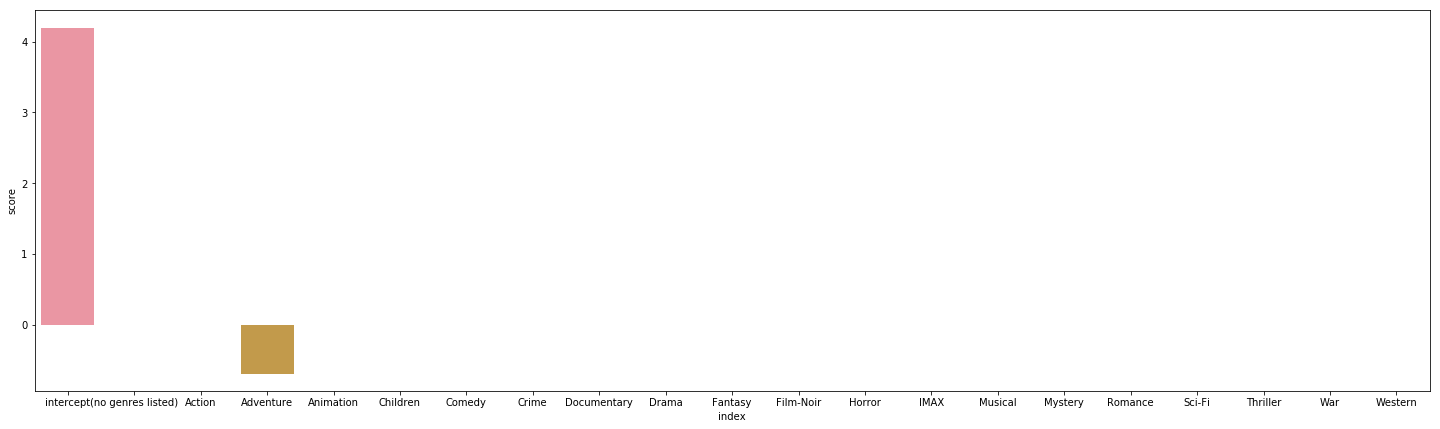

In [56]:
plt.figure(figsize=(25,7))
sns.barplot(data=user1000_profile.reset_index(), x='index', y='score')

* my data 를 보충해서 나에게 맞는 영화를 추천해보자 to be contiuned....